In [1]:
#Part 1- Building the CNN
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [11]:
#Initializing the CNN
classifier = Sequential()

#step 1 Convolution
classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation ='relu'))

#step 2 Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening 
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


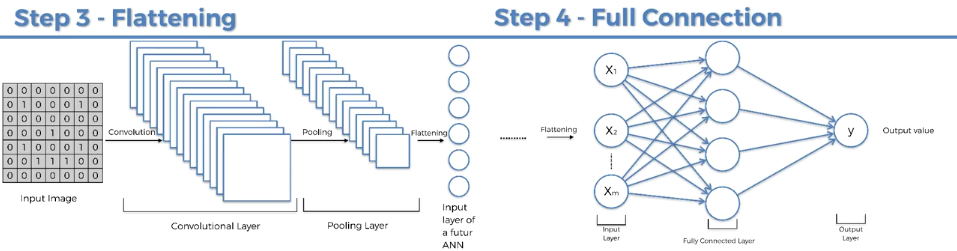

In [13]:
from IPython.display import Image
Image("cnn.png")

In [ ]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000)


#Output till 2 complete epoch
# Found 8000 images belonging to 2 classes.
# Found 2000 images belonging to 2 classes.
# Epoch 1/25
# 8000/8000 [==============================] - 1387s - loss: 0.3887 - acc: 0.8150 - val_loss: 0.4256 - val_acc: 0.8313
# Epoch 2/25
# 8000/8000 [==============================] - 1519s - loss: 0.1833 - acc: 0.9241 - val_loss: 0.6152 - val_acc: 0.8187
# Epoch 3/25
#  110/8000 [..............................] - ETA: 1357s - loss: 0.1239 - acc: 0.9486


In [ ]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'